In [1]:
%matplotlib inline              
from pylab import *

In [2]:
P = array([[.7, .3, 0], [.3, .5, .2], [.1, .4, .5]])

In [3]:
def X(x0,P=P,T=100):
    # Function X supplies a trajectory of the discrete Markov chain 
    # with initial state x0 and transition matrix P, till time T
    x = [x0]
    for _ in range(T):
        #####################
        # supply the vector p of probabilities to transit to states
        # 1,2,3 from the last calculated state
        p = P[x[-1] - 1]
        #####################
        u = rand()
        if u<p[0]:
            x.append(1)
        elif u<p[0]+p[1]:
            x.append(2)
        else:
            x.append(3)
    return array(x)

V1 = mean(X(x0=1,T=10**4)) 

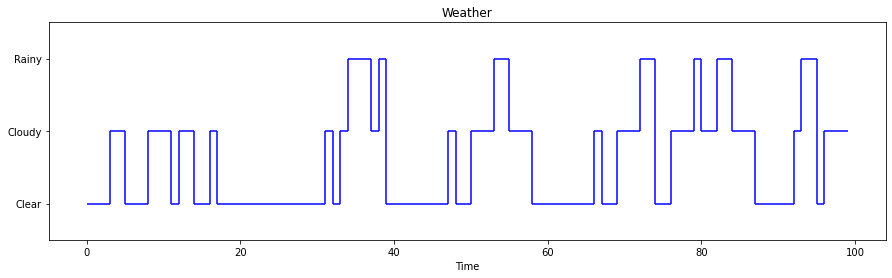

In [4]:
def step(x,y,Tmax=0,color='b'):
    # step function
    # plots a step function representing the number
    # of clients in the system at each instant
    if Tmax==0:
        Tmax = max(x)
    x = append(x,[Tmax])  # number of clients
    y = append(y,[y[-1]]) # instants of events
    for k in range(len(x)-1):
        vlines(x[k+1],y[k],y[k+1],color=color)
        hlines(y[k],x[k],x[k+1],color=color)
        
T = 100
x = X(x0=1)
figure(num=None, figsize=(15, 4))
step(range(T),x)
axis(ymin=0.5,ymax=3.5)
xlabel("Time")
title("Weather")
yticks([1.0,2.0,3.0], ["Clear","Cloudy","Rainy"]);

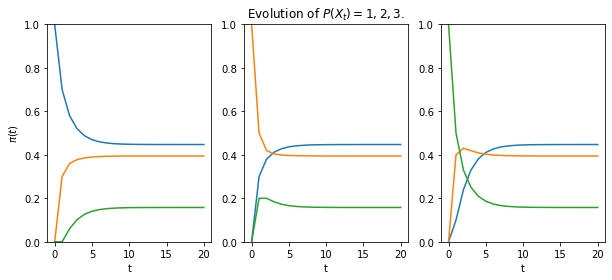

In [5]:
T = 20

def PI(pi0,P=P,T=T):
    # Function PI computes the state probability vectors
    # of the Markov chain until time T
    pi_ = array([pi0])
    for i in range(T):
        pi_ = vstack((pi_,pi_[-1] @ P))
    return pi_

def plot_PI(x0):
    # subplot(1,3,n+1) of successive states probabilities 
    # with initial state x0
    pi_0 = zeros(3)
    pi_0[x0-1] = 1
    pi_  = PI(pi_0)
    subplot(1,3,x0)
    plot(pi_)
    xlabel('t');axis(ymin=0,ymax=1)
    if x0==1: ylabel(r"$\pi(t)$")
    if x0==2: title("Evolution of $P(X_t)=1,2,3$.")

rcParams["figure.figsize"] = (10., 4.)
for x0 in range(1,4):
    plot_PI(x0)

In [6]:
from scipy.linalg import solve
####################
# complete the code to get the steady state distribution
# of the discrete time Markov chain
pi_ = solve(array([[-.3,  .3,  .1], [.3,  -.5, .4], [1, 1,  1]]), array([[0], [0], [1]]))
print("steady state distribution: pi* =",pi_)
####################
V2,V3 = pi_[0][0],pi_[1][0]

steady state distribution: pi* = [[0.44736842]
 [0.39473684]
 [0.15789474]]


In [7]:
print("---------------------------\n"
      +"RESULTS SUPPLIED FOR LAB 3:\n"
      +"---------------------------")
results = ("V"+str(k) for k in range(1,4))
for x in results:
    try:
        print(x+" = {0:.2f}".format(eval(x)))
    except:
        print(x+": variable is undefined")  

---------------------------
RESULTS SUPPLIED FOR LAB 3:
---------------------------
V1 = 1.71
V2 = 0.45
V3 = 0.39
